In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModel
from typing import List, Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

In [2]:
class ConceptosBasicos:
    """Clase para demostrar conceptos fundamentales de modelos de lenguaje"""
    
    def __init__(self):
        self.tokenizer = None
        self.model = None
        print("🚀 Inicializando conceptos básicos de modelos de lenguaje...")
    
    def demo_tokenizacion(self, texto: str = "Hola mundo, este es un ejemplo de tokenización"):
        """
        Demostración de tokenización - convertir texto en tokens
        
        Args:
            texto (str): Texto a tokenizar
        """
        print("\n" + "="*60)
        print("🔤 DEMOSTRACIÓN DE TOKENIZACIÓN")
        print("="*60)
        
        # Cargar tokenizer (usando un modelo pequeño para demo)
        print("📥 Cargando tokenizer...")
        self.tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
        
        print(f"\n📝 Texto original: '{texto}'")
        
        # Tokenización básica
        tokens = self.tokenizer.tokenize(texto)
        print(f"🔤 Tokens: {tokens}")
        print(f"📊 Número de tokens: {len(tokens)}")
        
        # Conversión a IDs
        token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
        print(f"🔢 Token IDs: {token_ids}")
        
        # Usando el pipeline completo
        encoded = self.tokenizer(texto, return_tensors="pt")
        print(f"\n🎯 Encoding completo:")
        print(f"   Input IDs: {encoded['input_ids'].tolist()}")
        print(f"   Attention Mask: {encoded['attention_mask'].tolist()}")
        
        # Decodificación
        decoded = self.tokenizer.decode(encoded['input_ids'][0])
        print(f"🔄 Texto decodificado: '{decoded}'")
        
        # Análisis de vocabulario
        vocab_size = self.tokenizer.vocab_size
        print(f"\n📚 Tamaño del vocabulario: {vocab_size:,} tokens")
        
        return tokens, token_ids
    
    def demo_embeddings(self, texto: str = "Los embeddings capturan significado semántico"):
        """
        Demostración de embeddings - representaciones vectoriales de tokens
        
        Args:
            texto (str): Texto para generar embeddings
        """
        print("\n" + "="*60)
        print("🎯 DEMOSTRACIÓN DE EMBEDDINGS")
        print("="*60)
        
        # Cargar modelo pequeño para demo
        print("📥 Cargando modelo para embeddings...")
        self.tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
        self.model = AutoModel.from_pretrained("distilbert-base-uncased")
        
        print(f"📝 Texto: '{texto}'")
        
        # Tokenizar
        inputs = self.tokenizer(texto, return_tensors="pt", padding=True, truncation=True)
        
        # Generar embeddings
        with torch.no_grad():
            outputs = self.model(**inputs)
            embeddings = outputs.last_hidden_state
        
        print(f"📐 Forma de embeddings: {embeddings.shape}")
        print(f"   - Batch size: {embeddings.shape[0]}")
        print(f"   - Longitud secuencia: {embeddings.shape[1]}")
        print(f"   - Dimensión embedding: {embeddings.shape[2]}")
        
        # Análisis de embeddings
        embedding_mean = embeddings.mean(dim=1).squeeze()
        embedding_std = embeddings.std(dim=1).squeeze()
        
        print(f"\n📊 Estadísticas de embeddings:")
        print(f"   Media: {embedding_mean.mean().item():.4f}")
        print(f"   Desviación estándar: {embedding_std.mean().item():.4f}")
        print(f"   Rango: [{embeddings.min().item():.4f}, {embeddings.max().item():.4f}]")
        
        # Visualizar distribución de embeddings
        self._visualizar_embeddings(embeddings.squeeze().numpy())
        
        return embeddings
    
    def demo_atencion_simple(self, secuencia: List[str] = ["El", "gato", "está", "durmiendo"]):
        """
        Demostración simplificada del mecanismo de atención
        
        Args:
            secuencia (List[str]): Secuencia de palabras para demostrar atención
        """
        print("\n" + "="*60)
        print("👁️ DEMOSTRACIÓN DE MECANISMO DE ATENCIÓN")
        print("="*60)
        
        print(f"📝 Secuencia: {' '.join(secuencia)}")
        
        # Crear embeddings sintéticos simples
        vocab_size = len(secuencia)
        embedding_dim = 4  # Dimensión pequeña para visualización
        
        # Embeddings aleatorios pero reproducibles
        torch.manual_seed(42)
        embeddings = torch.randn(vocab_size, embedding_dim)
        
        print(f"\n🎯 Embeddings sintéticos (shape: {embeddings.shape}):")
        for i, palabra in enumerate(secuencia):
            print(f"   {palabra}: {embeddings[i].tolist()}")
        
        # Implementación simple de atención
        def atencion_simple(Q, K, V):
            """Implementación simplificada de atención"""
            # Calcular scores de atención
            scores = torch.matmul(Q, K.transpose(-2, -1))
            
            # Aplicar softmax
            attention_weights = torch.softmax(scores, dim=-1)
            
            # Aplicar pesos a valores
            output = torch.matmul(attention_weights, V)
            
            return output, attention_weights
        
        # Para simplicidad, usar embeddings como Q, K, V
        Q = K = V = embeddings
        
        # Calcular atención
        output, attention_weights = atencion_simple(Q, K, V)
        
        print(f"\n🔍 Matriz de atención:")
        self._imprimir_matriz_atencion(attention_weights.numpy(), secuencia)
        
        print(f"\n📊 Output después de atención:")
        for i, palabra in enumerate(secuencia):
            print(f"   {palabra}: {output[i].tolist()}")
        
        # Visualizar matriz de atención
        self._visualizar_atencion(attention_weights.numpy(), secuencia)
        
        return output, attention_weights
    
    def demo_comparacion_modelos(self):
        """
        Comparación entre diferentes tipos de modelos de lenguaje
        """
        print("\n" + "="*60)
        print("📊 COMPARACIÓN DE MODELOS DE LENGUAJE")
        print("="*60)
        
        # Datos de comparación (simplificados para demo)
        modelos = {
            'N-gram': {
                'contexto': 5,
                'paralelizacion': 'Alta',
                'memoria': 'Baja',
                'calidad': 'Baja'
            },
            'RNN/LSTM': {
                'contexto': 100,
                'paralelizacion': 'Baja',
                'memoria': 'Media',
                'calidad': 'Media'
            },
            'Transformer': {
                'contexto': 2048,
                'paralelizacion': 'Alta',
                'memoria': 'Alta',
                'calidad': 'Alta'
            },
            'Llama 3.1': {
                'contexto': 128000,
                'paralelizacion': 'Alta',
                'memoria': 'Optimizada',
                'calidad': 'Muy Alta'
            }
        }
        
        print("🏆 Comparación de características:")
        print(f"{'Modelo':<12} {'Contexto':<10} {'Paralelización':<15} {'Memoria':<12} {'Calidad':<10}")
        print("-" * 65)
        
        for modelo, caracteristicas in modelos.items():
            print(f"{modelo:<12} {caracteristicas['contexto']:<10} "
                  f"{caracteristicas['paralelizacion']:<15} "
                  f"{caracteristicas['memoria']:<12} {caracteristicas['calidad']:<10}")
        
        # Visualizar evolución
        self._visualizar_evolucion_modelos(modelos)
    
    def demo_preprocesamiento_texto(self, texto: str = "¡Hola! ¿Cómo estás? Espero que bien... 😊"):
        """
        Demostración de preprocesamiento de texto
        
        Args:
            texto (str): Texto a preprocesar
        """
        print("\n" + "="*60)
        print("🔧 DEMOSTRACIÓN DE PREPROCESAMIENTO")
        print("="*60)
        
        print(f"📝 Texto original: '{texto}'")
        
        # Cargar tokenizer
        if self.tokenizer is None:
            self.tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
        
        # Diferentes estrategias de preprocesamiento
        estrategias = {
            'Original': texto,
            'Lowercase': texto.lower(),
            'Sin puntuación': ''.join(c for c in texto if c.isalnum() or c.isspace()),
            'Tokenizado': ' '.join(self.tokenizer.tokenize(texto))
        }
        
        print(f"\n🔄 Diferentes estrategias de preprocesamiento:")
        for estrategia, resultado in estrategias.items():
            print(f"   {estrategia}: '{resultado}'")
        
        # Análisis de tokens especiales
        print(f"\n🎯 Tokens especiales del tokenizer:")
        tokens_especiales = {
            'PAD': self.tokenizer.pad_token,
            'UNK': self.tokenizer.unk_token,
            'CLS': self.tokenizer.cls_token,
            'SEP': self.tokenizer.sep_token,
            'MASK': self.tokenizer.mask_token
        }
        
        for nombre, token in tokens_especiales.items():
            if token:
                print(f"   {nombre}: '{token}' (ID: {self.tokenizer.convert_tokens_to_ids(token)})")
        
        return estrategias
    
    def _visualizar_embeddings(self, embeddings: np.ndarray):
        """Visualizar distribución de embeddings"""
        try:
            plt.figure(figsize=(10, 6))
            
            # Histograma de valores de embedding
            plt.subplot(1, 2, 1)
            plt.hist(embeddings.flatten(), bins=50, alpha=0.7, color='skyblue')
            plt.title('Distribución de Valores de Embedding')
            plt.xlabel('Valor')
            plt.ylabel('Frecuencia')
            
            # Heatmap de embeddings
            plt.subplot(1, 2, 2)
            sns.heatmap(embeddings[:10, :10], cmap='viridis', cbar=True)
            plt.title('Heatmap de Embeddings (10x10)')
            plt.xlabel('Dimensión')
            plt.ylabel('Token')
            
            plt.tight_layout()
            plt.savefig('embeddings_visualization.png', dpi=150, bbox_inches='tight')
            plt.show()
            print("📊 Visualización guardada como 'embeddings_visualization.png'")
        except Exception as e:
            print(f"⚠️ No se pudo crear visualización: {e}")
    
    def _imprimir_matriz_atencion(self, attention_weights: np.ndarray, secuencia: List[str]):
        """Imprimir matriz de atención de forma legible"""
        print(f"{'':>10}", end="")
        for palabra in secuencia:
            print(f"{palabra:>8}", end="")
        print()
        
        for i, palabra_query in enumerate(secuencia):
            print(f"{palabra_query:>10}", end="")
            for j in range(len(secuencia)):
                print(f"{attention_weights[i, j]:>8.3f}", end="")
            print()
    
    def _visualizar_atencion(self, attention_weights: np.ndarray, secuencia: List[str]):
        """Visualizar matriz de atención"""
        try:
            plt.figure(figsize=(8, 6))
            sns.heatmap(attention_weights, 
                       xticklabels=secuencia, 
                       yticklabels=secuencia,
                       annot=True, 
                       fmt='.3f', 
                       cmap='Blues',
                       cbar_kws={'label': 'Peso de Atención'})
            plt.title('Matriz de Atención')
            plt.xlabel('Keys (Atendido)')
            plt.ylabel('Queries (Atendiendo)')
            plt.tight_layout()
            plt.savefig('attention_matrix.png', dpi=150, bbox_inches='tight')
            plt.show()
            print("📊 Matriz de atención guardada como 'attention_matrix.png'")
        except Exception as e:
            print(f"⚠️ No se pudo crear visualización: {e}")
    
    def _visualizar_evolucion_modelos(self, modelos: Dict):
        """Visualizar evolución de modelos de lenguaje"""
        try:
            # Convertir contexto a valores numéricos para visualización
            contexto_vals = [modelos[m]['contexto'] for m in modelos.keys()]
            
            plt.figure(figsize=(12, 8))
            
            # Gráfico de barras para contexto
            plt.subplot(2, 2, 1)
            plt.bar(modelos.keys(), contexto_vals, color=['red', 'orange', 'blue', 'green'])
            plt.title('Capacidad de Contexto')
            plt.ylabel('Tokens de Contexto')
            plt.yscale('log')
            
            # Gráfico de características cualitativas
            plt.subplot(2, 2, 2)
            calidad_map = {'Baja': 1, 'Media': 2, 'Alta': 3, 'Muy Alta': 4}
            calidad_vals = [calidad_map[modelos[m]['calidad']] for m in modelos.keys()]
            plt.plot(list(modelos.keys()), calidad_vals, 'o-', linewidth=2, markersize=8)
            plt.title('Evolución de Calidad')
            plt.ylabel('Nivel de Calidad')
            plt.ylim(0, 5)
            
            plt.tight_layout()
            plt.savefig('model_evolution.png', dpi=150, bbox_inches='tight')
            plt.show()
            print("📊 Evolución de modelos guardada como 'model_evolution.png'")
        except Exception as e:
            print(f"⚠️ No se pudo crear visualización: {e}")

In [3]:
# Crear instancia de la clase
conceptos = ConceptosBasicos()
    
# Demo 1: Tokenización
conceptos.demo_tokenizacion()




        


🚀 Inicializando conceptos básicos de modelos de lenguaje...

🔤 DEMOSTRACIÓN DE TOKENIZACIÓN
📥 Cargando tokenizer...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]


📝 Texto original: 'Hola mundo, este es un ejemplo de tokenización'
🔤 Tokens: ['ho', '##la', 'mundo', ',', 'este', 'es', 'un', 'e', '##je', '##mp', '##lo', 'de', 'token', '##iza', '##cion']
📊 Número de tokens: 15
🔢 Token IDs: [7570, 2721, 25989, 1010, 28517, 9686, 4895, 1041, 6460, 8737, 4135, 2139, 19204, 21335, 10446]

🎯 Encoding completo:
   Input IDs: [[101, 7570, 2721, 25989, 1010, 28517, 9686, 4895, 1041, 6460, 8737, 4135, 2139, 19204, 21335, 10446, 102]]
   Attention Mask: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
🔄 Texto decodificado: '[CLS] hola mundo, este es un ejemplo de tokenizacion [SEP]'

📚 Tamaño del vocabulario: 30,522 tokens


(['ho',
  '##la',
  'mundo',
  ',',
  'este',
  'es',
  'un',
  'e',
  '##je',
  '##mp',
  '##lo',
  'de',
  'token',
  '##iza',
  '##cion'],
 [7570,
  2721,
  25989,
  1010,
  28517,
  9686,
  4895,
  1041,
  6460,
  8737,
  4135,
  2139,
  19204,
  21335,
  10446])


🎯 DEMOSTRACIÓN DE EMBEDDINGS
📥 Cargando modelo para embeddings...


2025-07-31 18:08:42.222879: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753985322.472062      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753985322.546441      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

📝 Texto: 'Los embeddings capturan significado semántico'
📐 Forma de embeddings: torch.Size([1, 15, 768])
   - Batch size: 1
   - Longitud secuencia: 15
   - Dimensión embedding: 768

📊 Estadísticas de embeddings:
   Media: -0.0103
   Desviación estándar: 0.2591
   Rango: [-9.8621, 3.3841]


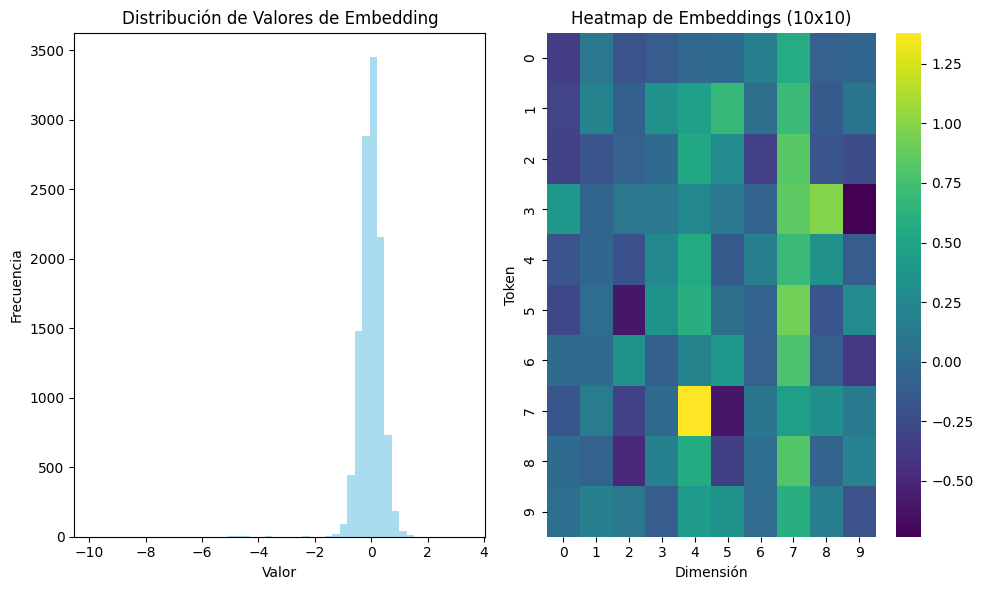

📊 Visualización guardada como 'embeddings_visualization.png'


tensor([[[-0.3519,  0.1023, -0.1898,  ..., -0.3490,  0.4285,  0.3708],
         [-0.3123,  0.2134, -0.0952,  ..., -0.5298, -0.0065,  0.2390],
         [-0.3296, -0.1801, -0.0881,  ..., -0.1924,  0.4500,  0.0438],
         ...,
         [ 0.2099,  0.6043,  0.2708,  ..., -0.1404,  0.1839,  0.0178],
         [-0.5962, -0.1903, -0.2827,  ..., -0.3236,  0.2572,  0.1514],
         [ 0.8557,  0.0205, -0.4686,  ...,  0.1003, -0.7874, -0.2341]]])

In [4]:
# Demo 2: Embeddings
conceptos.demo_embeddings()




👁️ DEMOSTRACIÓN DE MECANISMO DE ATENCIÓN
📝 Secuencia: El gato está durmiendo

🎯 Embeddings sintéticos (shape: torch.Size([4, 4])):
   El: [1.9269152879714966, 1.4872840642929077, 0.9007171988487244, -2.1055209636688232]
   gato: [0.6784184575080872, -1.2345448732376099, -0.04306747764348984, -1.6046669483184814]
   está: [-0.7521352767944336, 1.6487230062484741, -0.3924786448478699, -1.4036071300506592]
   durmiendo: [-0.7278813123703003, -0.5594301819801331, -0.7688388824462891, 0.7624453902244568]

🔍 Matriz de atención:
                El    gato    estádurmiendo
        El   0.999   0.000   0.001   0.000
      gato   0.147   0.843   0.007   0.003
      está   0.141   0.003   0.855   0.001
 durmiendo   0.001   0.045   0.039   0.915

📊 Output después de atención:
   El: [1.9252350330352783, 1.4867299795150757, 0.8998262286186218, -2.1050398349761963]
   gato: [0.8472374677658081, -0.8141696453094482, 0.09054362773895264, -1.6689996719360352]
   está: [-0.37063223123550415, 1.61491298

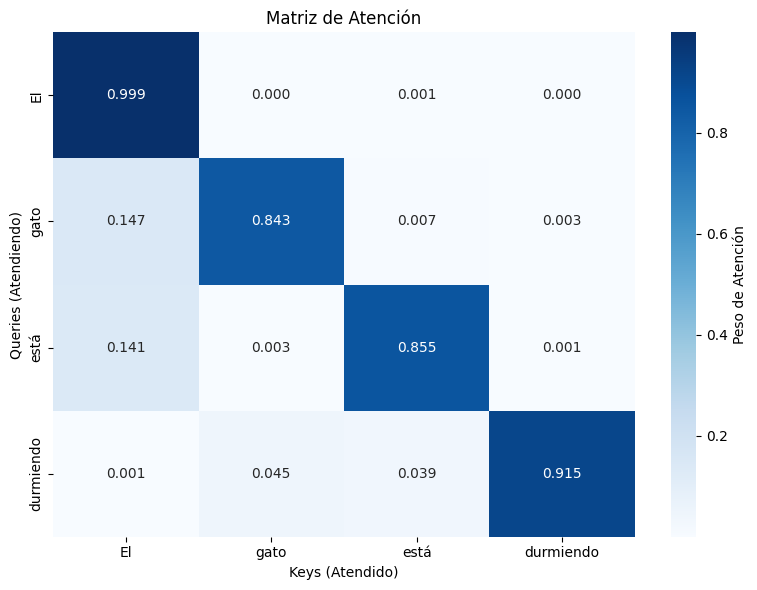

📊 Matriz de atención guardada como 'attention_matrix.png'


(tensor([[ 1.9252,  1.4867,  0.8998, -2.1050],
         [ 0.8472, -0.8142,  0.0905, -1.6690],
         [-0.3706,  1.6149, -0.2098, -1.5004],
         [-0.6619, -0.5014, -0.7193,  0.5676]]),
 tensor([[9.9925e-01, 2.3421e-04, 5.1794e-04, 1.5149e-07],
         [1.4655e-01, 8.4350e-01, 6.6854e-03, 3.2637e-03],
         [1.4084e-01, 2.9053e-03, 8.5503e-01, 1.2210e-03],
         [1.3112e-03, 4.5143e-02, 3.8864e-02, 9.1468e-01]]))

In [5]:
# Demo 3: Atención
conceptos.demo_atencion_simple()




📊 COMPARACIÓN DE MODELOS DE LENGUAJE
🏆 Comparación de características:
Modelo       Contexto   Paralelización  Memoria      Calidad   
-----------------------------------------------------------------
N-gram       5          Alta            Baja         Baja      
RNN/LSTM     100        Baja            Media        Media     
Transformer  2048       Alta            Alta         Alta      
Llama 3.1    128000     Alta            Optimizada   Muy Alta  


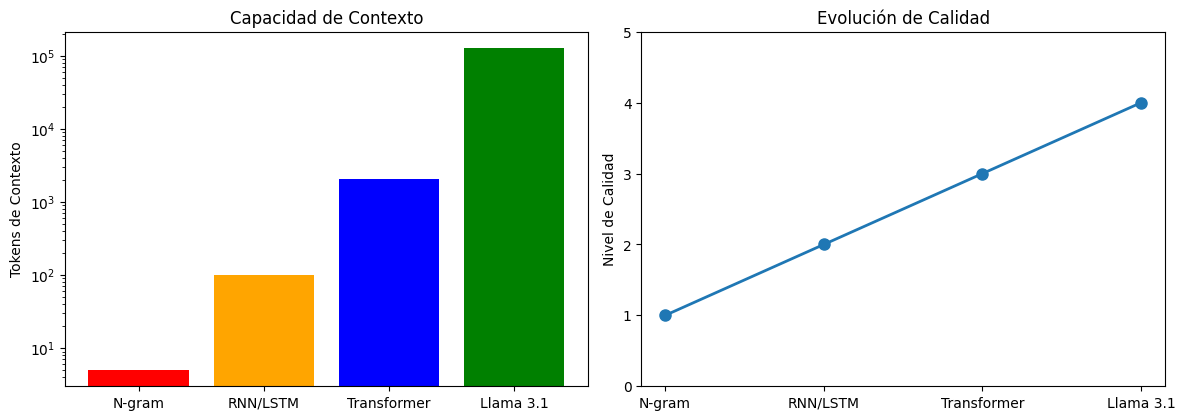

📊 Evolución de modelos guardada como 'model_evolution.png'


In [6]:
# Demo 4: Comparación de modelos
conceptos.demo_comparacion_modelos()



In [7]:
# Demo 5: Preprocesamiento
conceptos.demo_preprocesamiento_texto()


🔧 DEMOSTRACIÓN DE PREPROCESAMIENTO
📝 Texto original: '¡Hola! ¿Cómo estás? Espero que bien... 😊'

🔄 Diferentes estrategias de preprocesamiento:
   Original: '¡Hola! ¿Cómo estás? Espero que bien... 😊'
   Lowercase: '¡hola! ¿cómo estás? espero que bien... 😊'
   Sin puntuación: 'Hola Cómo estás Espero que bien '
   Tokenizado: '¡ ho ##la ! ¿ como est ##as ? es ##per ##o que bien . . . [UNK]'

🎯 Tokens especiales del tokenizer:
   PAD: '[PAD]' (ID: 0)
   UNK: '[UNK]' (ID: 100)
   CLS: '[CLS]' (ID: 101)
   SEP: '[SEP]' (ID: 102)
   MASK: '[MASK]' (ID: 103)


{'Original': '¡Hola! ¿Cómo estás? Espero que bien... 😊',
 'Lowercase': '¡hola! ¿cómo estás? espero que bien... 😊',
 'Sin puntuación': 'Hola Cómo estás Espero que bien ',
 'Tokenizado': '¡ ho ##la ! ¿ como est ##as ? es ##per ##o que bien . . . [UNK]'}